In [43]:
import pandas as pd
import numpy as n
import pickle
import re
from pathlib import Path
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

"""
root = Path(__file__).resolve().parent if "__file__" in globals() else Path.cwd()
while root.parent != root:
    if ((root / ".git").exists() and 
        (root / "README.txt").exists() and 
        (root / "results.ipynb").exists()): break
    root = root.parent
if str(root) not in sys.path: sys.path.insert(0, str(root))

print("Root folder at: ", root)"""

# Detect root starting from this file or from notebook’s cwd
try:
    start_path = Path(__file__).resolve()
except NameError:
    start_path = Path.cwd()

root = start_path
while root != root.parent:
    # Check for any known project markers
    if any((root / marker).exists() for marker in [".git", "README.md", "results.ipynb", "README.txt"]):
        break
    root = root.parent

# Sanity check — fallback if nothing found
if not any((root / marker).exists() for marker in [".git", "README.md", "results.ipynb", "README.txt"]):
    print("⚠️ Project root not found — defaulting to current working directory")
    root = Path.cwd()

print(f"✅ Root folder detected at: {root}")

# Add project root to sys.path if not already
if str(root) not in sys.path:
    sys.path.insert(0, str(root))

from src.utils.paths import *
from src.utils.general_utils import *

stored_dataprep_pkl_path = root / STORED_DATAPREP_PKL_PATH
with open(stored_dataprep_pkl_path, "rb") as f:
    data = pickle.load(f)

✅ Root folder detected at: /Users/todorovkatia/Documents/EPFL/MA3/ADA/Projet/ada-2025-project-adacore42


In [3]:
dataAm_rf = pd.read_csv("/Users/todorovkatia/Documents/EPFL/MA3/ADA/Projet/code_perso/dataAm_rf.csv") # created in Random_forest file

In [ ]:
sns.displot(dataAm_rf, x="funny_score", bins=100)

In [4]:
dataAm_rf.shape

(2513778, 21)

In [16]:
dataAm_rf=dataAm_rf.sort_values(by='funny_score', ascending=False)
dataAm_rf= dataAm_rf.drop_duplicates('caption')
df_funny = dataAm_rf.iloc[:2000,:]

df_midfunny = dataAm_rf.iloc[500:7000,:]

df_midfunny = dataAm_rf.iloc[30000:,:]
df_midfunny

,Unnamed: 0,caption,mean,precision,votes,not_funny,somewhat_funny,funny,funny_score,source_id,...,words,num_words,adjectives,proper_nouns,num_proper_nouns,num_verbs,polarity,subjectivity,num_punct,num_repeats
560636,560636,That backpack would never fit in the overhead.,1.625000,0.140204,32,18,8,6,1.53,94,...,"['That', 'backpack', 'would', 'never', 'fit', ...",8,[],[],0,1,-0.20000,0.400000,1,0
560637,560637,"Hank, check our coordinates . . . I think we p...",1.625000,0.140204,32,18,8,6,1.53,94,...,"['Hank', 'check', 'our', 'coordinates', 'I', '...",13,[],['Hank'],1,3,0.00000,0.000000,5,0
1567554,1567554,He and his wife had a falling out.,1.582781,0.061157,151,87,40,24,1.53,235,...,"['He', 'and', 'his', 'wife', 'had', 'a', 'fall...",8,[],[],0,2,0.00000,0.000000,1,0
243335,243335,Your Mom and I begged you to go to a regular c...,1.566914,0.032122,538,316,139,83,1.53,42,...,"['Your', 'Mom', 'and', 'I', 'begged', 'you', '...",12,['regular'],[],0,2,0.00000,0.076923,1,0
1644255,1644255,I want them to see my true colors,1.569767,0.054750,172,97,52,23,1.53,244,...,"['I', 'want', 'them', 'to', 'see', 'my', 'true...",8,['true'],[],0,2,0.35000,0.650000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477208,477208,They want to know if they can work remotely du...,1.000000,0.000158,6313,6313,0,0,-17.50,80,...,"['They', 'want', 'to', 'know', 'if', 'they', '...",12,[],[],0,3,-0.10000,0.200000,0,0
477209,477209,I am concerned that this project could go sout...,1.000000,0.000157,6359,6359,0,0,-17.52,80,...,"['I', 'am', 'concerned', 'that', 'this', 'proj...",11,['concerned'],[],0,2,0.20000,0.600000,1,0
477216,477216,"Ever so subtly, Ed began to push his right win...",1.000000,0.000157,6377,6377,0,0,-17.52,80,...,"['Ever', 'so', 'subtly', 'Ed', 'began', 'to', ...",11,['right'],['Ed'],1,2,-0.02381,0.517857,2,0
477211,477211,I'm pretty sure I said 'hackers'.,1.000000,0.000157,6366,6366,0,0,-17.52,80,...,"['I', ""'m"", 'pretty', 'sure', 'I', 'said', ""'h...",7,"['pretty', 'sure']",[],0,2,0.37500,0.944444,4,0


In [ ]:
# rescale score

all_scores = pd.concat([df['funny_score'] for df in dataA4])

global_min = all_scores.min()
global_max = all_scores.max()

for df in dataA4:
    df["funny_score_scaled"] = 100 * (df["funny_score"] - global_min) / (global_max - global_min)

In [44]:
dataA = data['dataA']
dfs_with_id = [
    df.assign(source_id=i)   # ajoute une colonne avec l’indice du DF
    for i, df in enumerate(dataA)
]

# Concaténation des DataFrames
dataAm2 = pd.concat(dfs_with_id, ignore_index=True)
dataAm2.sort_values(by='funny_score_scaled', ascending=False, inplace=True)

In [45]:
dataAm2

,caption,mean,precision,votes,not_funny,somewhat_funny,funny,funny_score,funny_score_scaled,funny_group,source_id
862178,Lunch is on me.,2.518294,0.004085,25200,2183,7784,15232,36.70,100.000000,funny,153
452628,Mission accomplished. We will report that this...,2.998918,0.001083,924,0,1,923,34.13,95.262673,funny,88
1041265,Looks like you're already familiar with the si...,2.387410,0.005740,14726,1941,5211,7574,30.64,88.829493,funny,188
1048528,I just want to make sure 'mousse' isn't a typo.,2.354409,0.006038,14266,2078,5048,7126,29.57,86.857143,funny,189
934245,Is the salmon fresh?,2.338348,0.005993,14423,2164,5232,7027,29.14,86.064516,funny,168
...,...,...,...,...,...,...,...,...,...,...,...
418100,They want to know if they can work remotely du...,1.000000,0.000158,6313,6313,0,0,-17.50,0.092166,not_funny,80
418101,"Ever so subtly, Ed began to push his right win...",1.000000,0.000157,6377,6377,0,0,-17.52,0.055300,not_funny,80
418102,I'm pretty sure I said 'hackers'.,1.000000,0.000157,6366,6366,0,0,-17.52,0.055300,not_funny,80
418103,I am concerned that this project could go sout...,1.000000,0.000157,6359,6359,0,0,-17.52,0.055300,not_funny,80


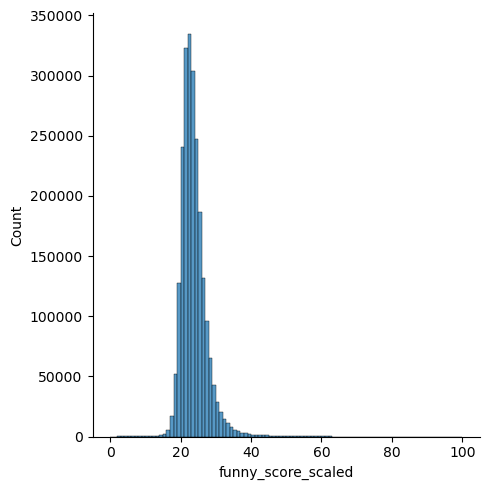

In [24]:

sns.displot(dataAm2, x="funny_score_scaled", bins=100)

In [37]:
# creation des groupes 
mean = dataAm2['funny_score_scaled'].mean()
sd = dataAm2['funny_score_scaled'].std()
high_treshold = mean+2*sd
low_treshold = mean-2*sd


def assign_group(row,high_threshold, low_threshold):
    #mean = dataAm2['funny_score_scaled'].mean()
    #sd = dataAm2['funny_score_scaled'].std()
    #print(mean+2*sd)

    if row['funny_score_scaled'] >=high_threshold:
        return 'funny'
    elif row['funny_score_scaled'] <=low_threshold:
        return 'not_funny'
    else:
        return 'mid_funny'
#dataAm2['funny_group_scaled'] = dataAm2.apply(assign_group, axis=1)
dataAm2['funny_group'] = dataAm2.apply(
    assign_group, 
    axis=1, 
    high_threshold=high_treshold, 
    low_threshold=low_treshold
)
#dataAm2['funny_group_scaled'] =assign_group(dataAm2,mean, sd)

In [42]:
low_treshold

np.float64(16.214284595625838)

In [38]:
dataAm2

,caption,mean,precision,votes,not_funny,somewhat_funny,funny,funny_score,funny_score_scaled,source_id,funny_group
862178,Lunch is on me.,2.518294,0.004085,25200,2183,7784,15232,36.70,100.000000,153,funny
452628,Mission accomplished. We will report that this...,2.998918,0.001083,924,0,1,923,34.13,95.262673,88,funny
1041265,Looks like you're already familiar with the si...,2.387410,0.005740,14726,1941,5211,7574,30.64,88.829493,188,funny
1048528,I just want to make sure 'mousse' isn't a typo.,2.354409,0.006038,14266,2078,5048,7126,29.57,86.857143,189,funny
934245,Is the salmon fresh?,2.338348,0.005993,14423,2164,5232,7027,29.14,86.064516,168,funny
...,...,...,...,...,...,...,...,...,...,...,...
418100,They want to know if they can work remotely du...,1.000000,0.000158,6313,6313,0,0,-17.50,0.092166,80,not_funny
418101,"Ever so subtly, Ed began to push his right win...",1.000000,0.000157,6377,6377,0,0,-17.52,0.055300,80,not_funny
418102,I'm pretty sure I said 'hackers'.,1.000000,0.000157,6366,6366,0,0,-17.52,0.055300,80,not_funny
418103,I am concerned that this project could go sout...,1.000000,0.000157,6359,6359,0,0,-17.52,0.055300,80,not_funny


In [40]:
dataAm2.funny_group.value_counts()

funny_group
mid_funny    2207445
funny          78781
not_funny       6452
Name: count, dtype: int64

In [ ]:
# what was added in dataprp : 
"""
all_scores = pd.concat([df['funny_score'] for df in dataA4])

global_min = all_scores.min()
global_max = all_scores.max()

for df in dataA4:
    df["funny_score_scaled"] = 100 * (df["funny_score"] - global_min) / (global_max - global_min)
    df = df.drop('funny_score', axis=1)

all_scores_2 = pd.concat([df['funny_score_scaled'] for df in dataA4])
mean = all_scores_2.mean()
sd = all_scores_2.std()
high_treshold = mean+2*sd
low_treshold = mean-2*sd

def assign_group(row,high_threshold, low_threshold):
    if row['funny_score_scaled'] >=high_threshold:
        return 'funny'
    elif row['funny_score_scaled'] <=low_threshold:
        return 'not_funny'
    else:
        return 'mid_funny'

for df in dataA4:
    df["funny_group"] = df.apply(assign_group, axis=1, high_threshold=high_treshold, low_threshold=low_treshold)

dataA = dataA4.copy()


display(dataA4[0].head(30))"""